In [76]:
%matplotlib notebook
import pandas as pd
import pymc3
import os
import json
import pymc
import matplotlib.pyplot as plt

In [111]:
carpeta_resultados: str = "../../tmp/"
carpeta_datos: str = "../../inst/extdata/erradicaciones-mamiferos/"
archivo_datos: str = carpeta_datos + "captura_gatos.csv"
archivos = [carpeta_resultados + archivo for archivo in os.listdir(carpeta_resultados) if archivo.endswith(".csv")]

In [112]:
capturas_acumuladas: int = pd.read_csv(archivo_datos).capturas.sum()
capturas_acumuladas

606

In [113]:
def find_quartil_hpd(archivo, q = 0.50):
    datos = pd.read_csv(archivo)
    porcentajeDatosDescartados = .95 # kernel = 1 - porcentajeDatosDescartados
    return {"li": datos.No.quantile(q=0.025), "vmp": pymc3.stats.hpd(datos.No, alpha=porcentajeDatosDescartados).mean(), "q": datos.No.quantile(q=q), "ls": datos.No.quantile(q=0.975)}

In [161]:
cuantil = 0.35
tamanios_poblacion = list(map(lambda archivo: find_quartil_hpd(archivo, cuantil), archivos))
tamanios_poblacion = pd.DataFrame(tamanios_poblacion)
tamanios_poblacion

'0.35'

In [153]:
tamanios_poblacion.median()-capturas_acumuladas # Remanentes

li     30.0
ls     84.0
q      47.0
vmp    42.5
dtype: float64

In [154]:
n_0: int = max(tamanios_poblacion.li.median(), tamanios_poblacion.vmp.median(), tamanios_poblacion.q.median())
x_i: int = capturas_acumuladas
n_i: int = n_0 - x_i
resultado = {"n_0":n_0, "x_i": x_i, "n_i":n_i}
resultado

{'n_0': 653.0, 'n_i': 47.0, 'x_i': 606}

In [155]:
with open(carpeta_resultados + "tamanio_poblacion_inicial.json", "w") as archivo_tamanio_poblacion:
    json.dump(resultado, archivo_tamanio_poblacion)

<IPython.core.display.Javascript object>


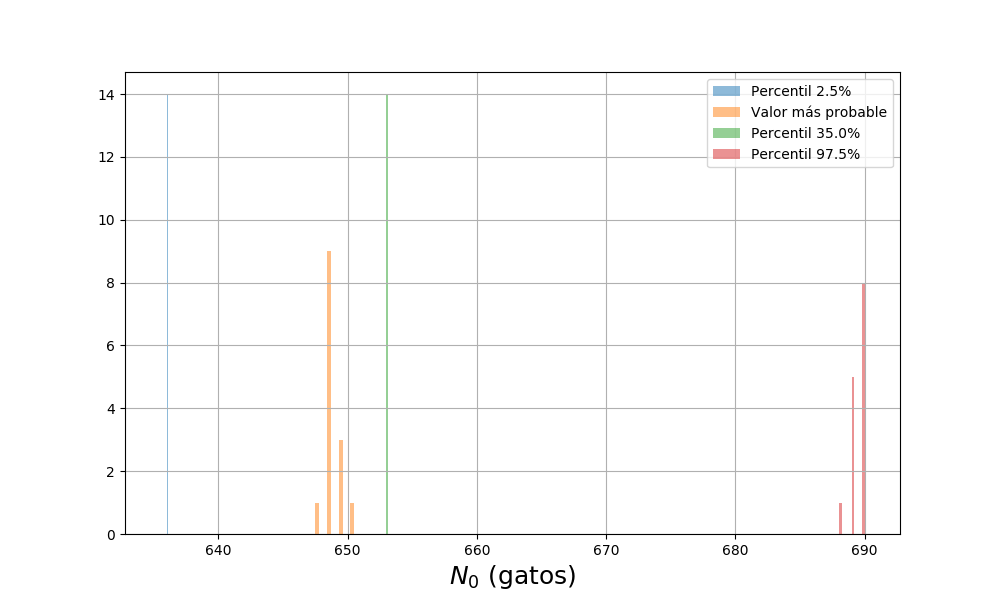

In [165]:
plt.figure(figsize=(10,6))
tamanios_poblacion.li.hist(label="Percentil 2.5%", alpha=0.5)
tamanios_poblacion.vmp.hist(label="Valor más probable", alpha=0.5)
tamanios_poblacion.q.hist(label="Percentil " + str(cuantil*100) + "%", alpha=0.5)
tamanios_poblacion.ls.hist(label="Percentil 97.5%", alpha=0.5)
plt.legend()
plt.xlabel("$N_0$ (gatos)", fontsize=18)